# Import the Dependencies

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, AveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np

# Load the Dataset

In [2]:
from keras.datasets import mnist

# use keras to import pre-shuffled mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("No. of training examples:", x_train.shape[0])
print("No. of test examples:", x_test.shape[0])

No. of training examples: 60000
No. of test examples: 10000


# Visualize the Dataset

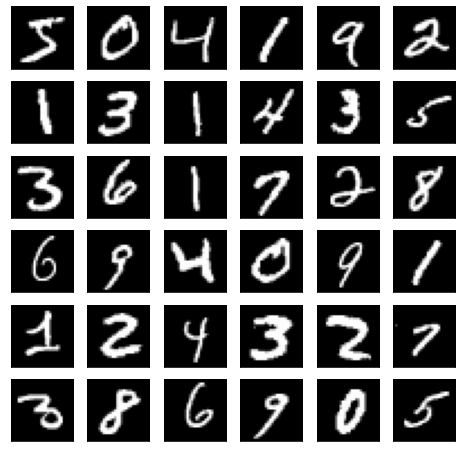

In [4]:
fig = plt.figure(figsize=(8, 8))
for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

# Preprocess the Dataset

In [5]:
# convert the pixel values from int to floats
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# divide the pixel values by 255.0 so that they range from 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# reshape the dataset
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [7]:
# Onehot-encode the labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Split the Dataset for **Training** and **Validation**

In [9]:
x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

In [10]:
print("x_train: ", x_train.shape[0])
print("x_valid: ", x_valid.shape[0])

x_train:  55000
x_valid:  5000


# Design the **LeNet** CNN Model Architecture

In [11]:
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=1, padding='same', activation='tanh', input_shape=(28, 28, 1)))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='tanh'))

# Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# set the learning rate schedule as created in the original paper
def lr_schedule(epoch):
    if epoch <= 2:     
        lr = 5e-4
    elif epoch > 2 and epoch <= 5:
        lr = 2e-4
    elif epoch > 5 and epoch <= 9:
        lr = 5e-5
    else: 
        lr = 1e-5
    return lr

lr_schedular = LearningRateScheduler(lr_schedule)
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

# train the Model
history = model.fit(x=x_train, 
                    y=y_train, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(x_valid, y_valid), 
                    callbacks=[lr_schedular, checkpointer],  
                    shuffle=True)

Epoch 1/20
1719/1719 [==============================] - 22s 4ms/step - loss: 0.4989 - accuracy: 0.8605 - val_loss: 0.1237 - val_accuracy: 0.9650

Epoch 00001: val_loss improved from inf to 0.12371, saving model to model.weights.best.hdf5
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1187 - accuracy: 0.9646 - val_loss: 0.0875 - val_accuracy: 0.9766

Epoch 00002: val_loss improved from 0.12371 to 0.08749, saving model to model.weights.best.hdf5
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0742 - accuracy: 0.9784 - val_loss: 0.0670 - val_accuracy: 0.9822

Epoch 00003: val_loss improved from 0.08749 to 0.06700, saving model to model.weights.best.hdf5
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0452 - accuracy: 0.9873 - val_loss: 0.0537 - val_accuracy: 0.9858

Epoch 00004: val_loss improved from 0.06700 to 0.05373, saving model to model.weights.best.hdf5
Epoch 5/20
1719/1719 [=================

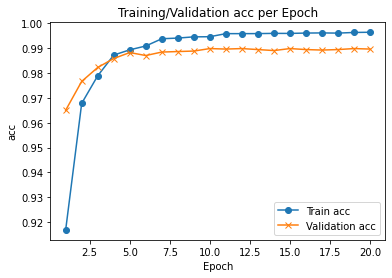

In [14]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

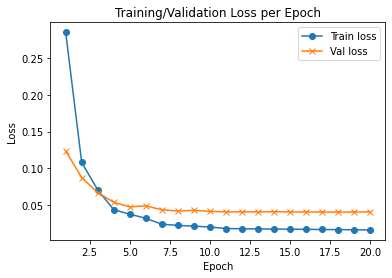

In [15]:
f, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

In [16]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [17]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.8600%
